### <center> Image Inpainting using Shearlets </center>


In [ ]:
push!(LOAD_PATH,pwd()*"/../../src") 
# import Shearlab
using Shearlab
using PyPlot
reload("Shearlab")

In [ ]:
# Download packages required for the Iterative Hard Thresholding
#Pkg.clone(git://github.com/klkeys/PLINK.jl.git)
#Pkg.clone(git://github.com/klkeys/RegressionTools.jl.git)
#Pkg.clone(git://github.com/klkeys/IHT.jl.git)

In [ ]:
#using IHT

In [ ]:
n =512;
# The path of the image
name = "../../data_samples/lena.jpg";
img = Shearlab.load_image(name, n);
img = img[:,:,1];

# Lets try two masks
name = "../../data_samples/data_inpainting_2d/mask_rand.png";
mask_rand = Shearlab.load_image(name, n);
mask_rand = mask_rand[:,:,1];
name = "../../data_samples/data_inpainting_2d/mask_squares.png";
mask_squares = Shearlab.load_image(name, n);
mask_squares = mask_squares[:,:,1];

In [ ]:
Shearlab.imageplot(img)

In [5]:
# Data 
imgMasked_rand = img.*mask_rand;
imgMasked_squares = img.*mask_squares;
stopFactor = 0.005; # The highest coefficient times stopFactor
sizeX = size(imgMasked_rand,1);
sizeY = size(imgMasked_rand,2);
nScales = 4;
shearLevels = [1, 1, 2, 2];

In [6]:
tic()
shearletsystem = getshearletsystem2D(sizeX, sizeY, nScales, shearLevels);
toc()

elapsed time: 25.581616718 seconds


25.581616718

In [7]:
tic()
coeffs = Shearlab.sheardec2D(imgMasked_rand,shearletsystem);
toc()

elapsed time: 1.448829221 seconds


### function inpaint2D (a.k.a SLExperimentInpaint2D) in 2D carpet using normalized iterative thresholding.

In [8]:
function inpaint2D(imgMasked,mask,iterations,stopFactor,shearletsystem)
    coeffs = Shearlab.sheardec2D(imgMasked,shearletsystem);
    coeffsNormalized = zeros(size(coeffs))+im*zeros(size(coeffs));
    for i in 1:shearletsystem.nShearlets
        coeffsNormalized[:,:,i] = coeffs[:,:,i]./shearletsystem.RMS[i];
    end
    delta = maximum(abs.(coeffsNormalized[:]));
    lambda=(stopFactor)^(1/(iterations-1));
    imgInpainted = zeros(size(imgMasked));
    #iterative thresholding
    for it = 1:iterations
        res = mask.*(imgMasked-imgInpainted);
        coeffs = Shearlab.sheardec2D(imgInpainted+res,shearletsystem);
        coeffsNormalized = zeros(size(coeffs))+im*zeros(size(coeffs));
        for i in 1:shearletsystem.nShearlets
            coeffsNormalized[:,:,i] = coeffs[:,:,i]./shearletsystem.RMS[i];
        end
        coeffs = coeffs.*(abs.(coeffsNormalized).>delta);
        imgInpainted = Shearlab.shearrec2D(coeffs,shearletsystem);  
        delta=delta*lambda;  
    end
    imgInpainted
end

inpaint2D (generic function with 1 method)

Lets run the function with the two masks and using different number of iterations (50 and 100).

In [9]:
tic()
imginpainted_rand50 = inpaint2D(imgMasked_rand,mask_rand,50,stopFactor,shearletsystem);
toc()

elapsed time: 221.665241697 seconds


221.665241697

In [14]:
tic()
imginpainted_rand100 = inpaint2D(imgMasked_rand,mask_rand,100,stopFactor,shearletsystem);
toc()

elapsed time: 204.761626951 seconds


204.761626951

In [15]:
tic()
imginpainted_rand200 = inpaint2D(imgMasked_rand,mask_rand,200,stopFactor,shearletsystem);
toc()

elapsed time: 389.483377708 seconds


389.483377708

Notice how the inpaint grows with the number of iterations linearly, very convinient :)

In [12]:
tic()
imginpainted_squares50 = inpaint2D(imgMasked_squares,mask_squares,50,stopFactor,shearletsystem);
toc()

elapsed time: 209.331327605 seconds


209.331327605

In [13]:
tic()
imginpainted_squares100 = inpaint2D(imgMasked_squares,mask_squares,100,stopFactor,shearletsystem);
toc()

LoadError: InterruptException:

In [18]:
tic()
imginpainted_squares200 = inpaint2D(imgMasked_squares,mask_squares,200,stopFactor,shearletsystem);
toc()

elapsed time: 388.121049505 seconds


388.121049505

### Comparsion of the images

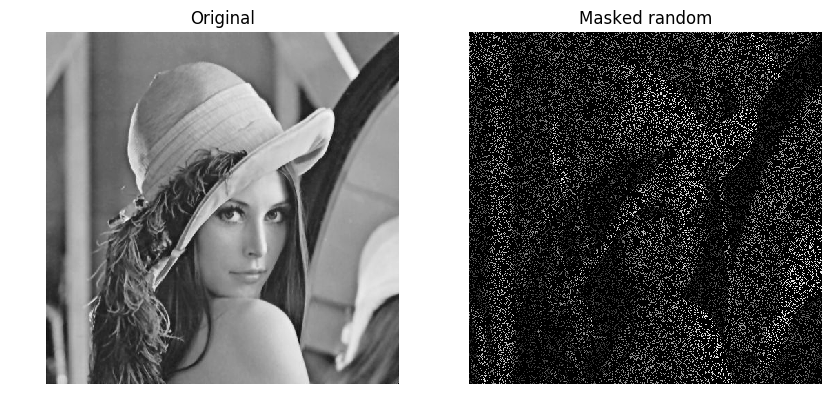

In [10]:
clf;
figure(figsize=(10,10));
Shearlab.imageplot(img, "Original", 1,2,1); 
Shearlab.imageplot(imgMasked_rand, "Masked random", 1,2,2); 

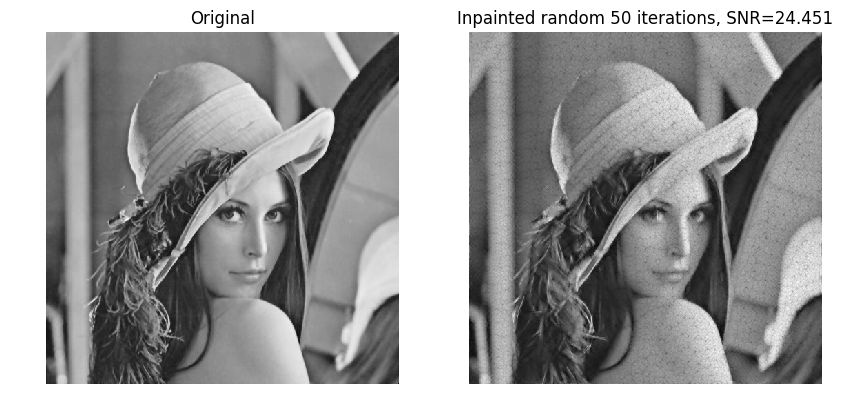

In [11]:
elin = Shearlab.snr(img,imginpainted_rand50);
# display
clf;
figure(figsize=(10,10));
Shearlab.imageplot(img, "Original", 1,2,1); 
u = @sprintf("Inpainted random 50 iterations, SNR=%.3f", elin);
Shearlab.imageplot(real(imginpainted_rand50), u, 1,2,2);

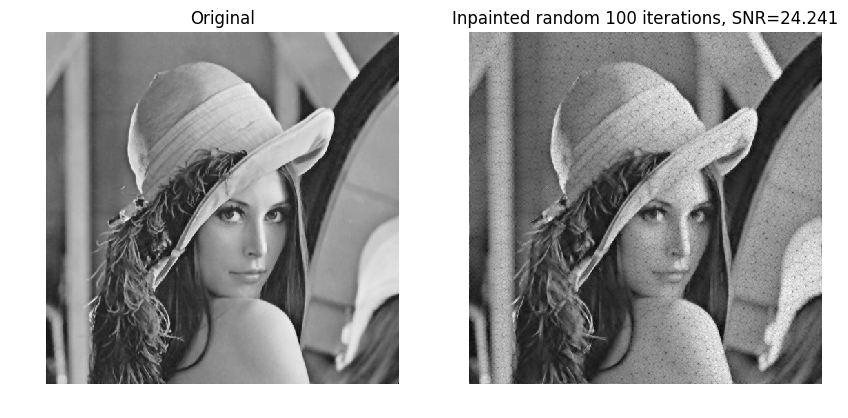

In [21]:
elin = Shearlab.snr(img,imginpainted_rand100);
# display
clf;
figure(figsize=(10,10));
Shearlab.imageplot(img, "Original", 1,2,1); 
u = @sprintf("Inpainted random 100 iterations, SNR=%.3f", elin);
Shearlab.imageplot(real(imginpainted_rand100), u, 1,2,2);

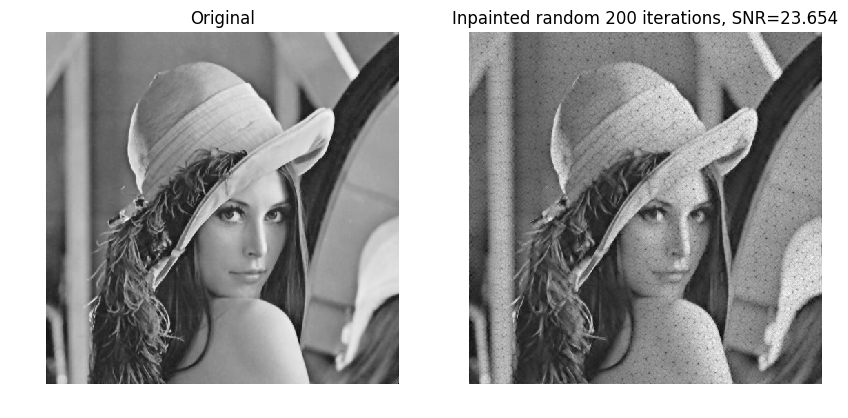

In [22]:
elin = Shearlab.snr(img,imginpainted_rand200);
# display
clf;
figure(figsize=(10,10));
Shearlab.imageplot(img, "Original", 1,2,1); 
u = @sprintf("Inpainted random 200 iterations, SNR=%.3f", elin);
Shearlab.imageplot(real(imginpainted_rand200), u, 1,2,2);

300 iterations for random mask

In [23]:
tic()
imginpainted_rand300 = inpaint2D(imgMasked_rand,mask_rand,300,stopFactor,shearletsystem);
toc()

elapsed time: 585.342890071 seconds


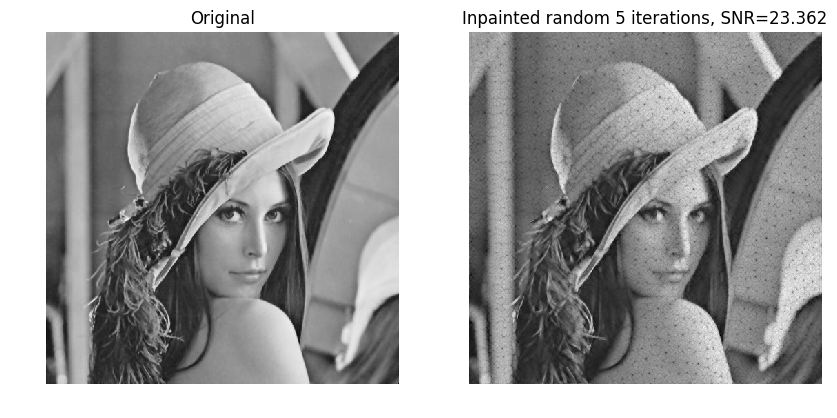

In [24]:
elin = Shearlab.snr(img, imginpainted_rand300);
# display
clf;
figure(figsize=(10,10));
Shearlab.imageplot(img, "Original", 1,2,1); 
u = @sprintf("Inpainted random 5 iterations, SNR=%.3f", elin);
Shearlab.imageplot(real(imginpainted_rand300), u, 1,2,2);

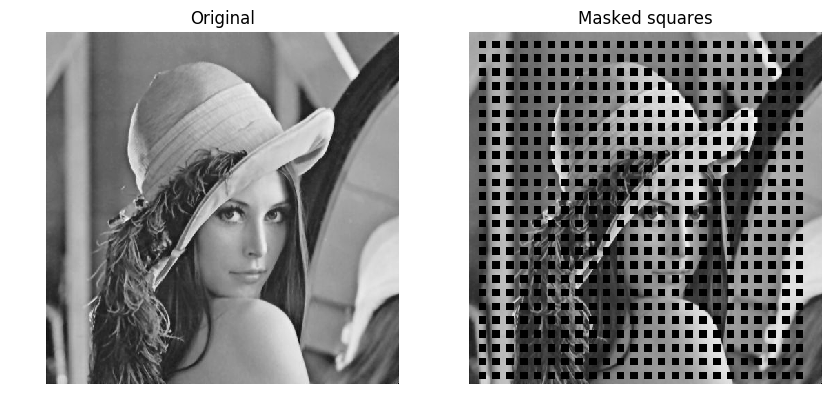

In [17]:
clf;
figure(figsize=(10,10));
Shearlab.imageplot(img, "Original", 1,2,1); 
Shearlab.imageplot(imgMasked_squares, "Masked squares", 1,2,2); 

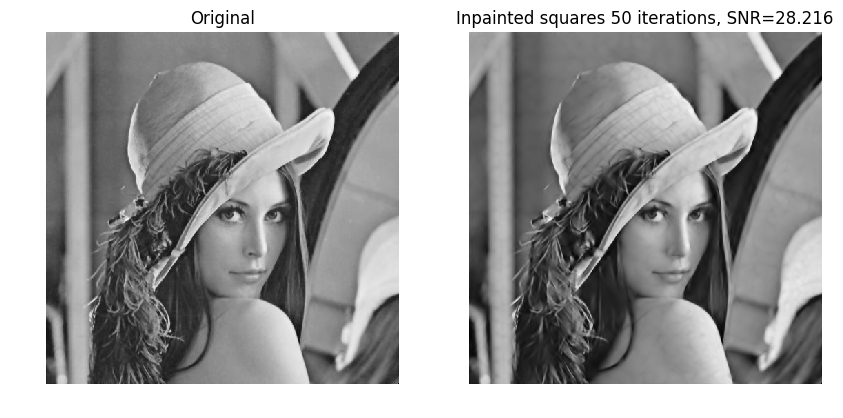

In [18]:
elin = Shearlab.snr(img,imginpainted_squares50);
# display
clf;
figure(figsize=(10,10));
Shearlab.imageplot(img, "Original", 1,2,1); 
u = @sprintf("Inpainted squares 50 iterations, SNR=%.3f", elin);
Shearlab.imageplot(real(imginpainted_squares50), u, 1,2,2);

In [16]:
elin = Shearlab.snr(img,imginpainted_squares100);
# display
clf;
figure(figsize=(10,10));
Shearlab.imageplot(img, "Original", 1,2,1); 
u = @sprintf("Inpainted squares 100 iterations, SNR=%.3f", elin);
Shearlab.imageplot(real(imginpainted_squares100), u, 1,2,2);

LoadError: UndefVarError: imginpainted_squares100 not defined

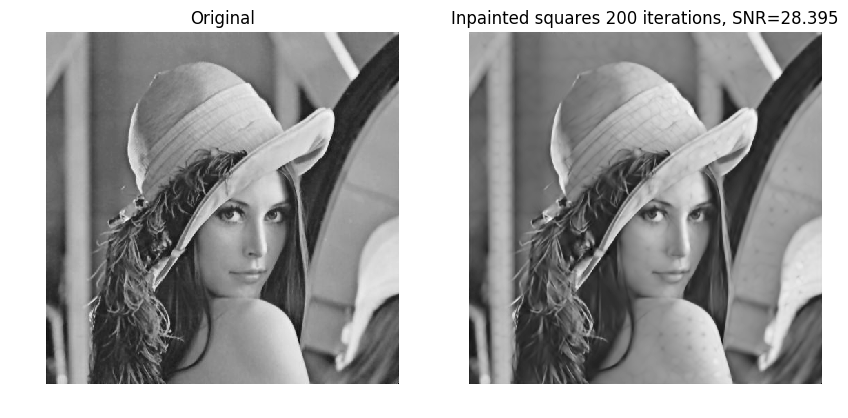

In [28]:
elin = Shearlab.snr(img,imginpainted_squares200);
# display
clf;
figure(figsize=(10,10));
Shearlab.imageplot(img, "Original", 1,2,1); 
u = @sprintf("Inpainted squares 200 iterations, SNR=%.3f", elin);
Shearlab.imageplot(real(imginpainted_squares200), u, 1,2,2);

300 iterations for squared mask

In [29]:
tic()
imginpainted_squares300 = inpaint2D(imgMasked_squares,mask_squares,300,stopFactor,shearletsystem);
toc()

elapsed time: 570.500692754 seconds


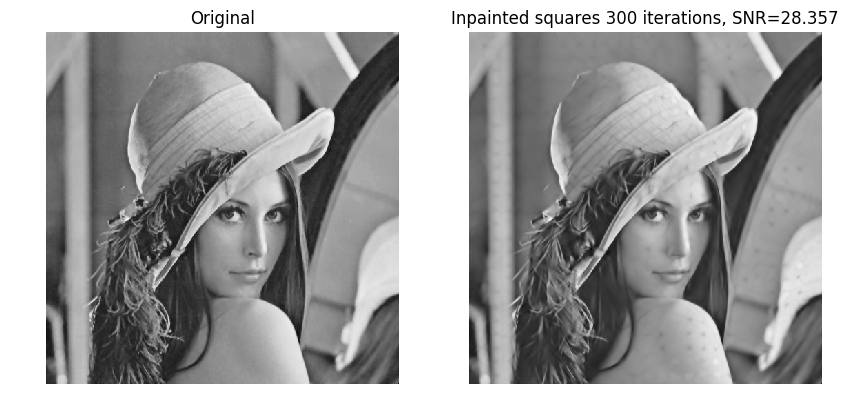

In [30]:
elin = Shearlab.snr(img,imginpainted_squares300);
# display
clf;
figure(figsize=(10,10));
Shearlab.imageplot(img, "Original", 1,2,1); 
u = @sprintf("Inpainted squares 300 iterations, SNR=%.3f", elin);
Shearlab.imageplot(real(imginpainted_squares300), u, 1,2,2);

### Faster Inpainting Alternative : Iterative thresholding in the article on Light Field Reconstruction Using Shearlet Transform (by Suren Vagharshakyan, et al.)

We have the next:
- $y^*\in\mathbb{R}^{N\times N}$ the original dense sampled image.
- $y\in\mathbb{R}^{N\times N}$ the masked image. 
- $\mathbf{M}\in\mathbb{R}^{N\times N}$ the masked image.
- $S:\mathbb{R}^{N\times N}\rightarrow \mathbb{R}^{N\times N\times \eta}$ the shearlet analysis transform, with $\eta$ the number of shearlets.
- $S^*:\mathbb{R}^{N\times N\times \eta}\rightarrow \mathbb{R}^{N\times N}$ the shearlet synthesis transform.

One does the inpainting with the next optimization problem
$$
y^*=\min_{x\in \mathbb{R}^{N\times N}} ||S(x)||_1 \text{  s.t. } y=\mathbf{M}x
$$
Solution is sought in the form of the following iterative thresholding algorithm
$$
x_{n+1} = S^*(T_{\lambda_n}(S(x_n+\alpha_n(y-\mathbf{M}x_n))))
$$
whit the hard thresholding operator 
$$
(T_{\lambda}x)(k) = 
\begin{cases}
x(k)\text{  ,  }|x(k)|\geq\lambda \\
0\text{  ,  } |x(k)|<\lambda
\end{cases}
$$
the thresholding level $\lambda_n$ decreases decreases with the iteration numbre lineraly in the range $[\lambda_{min},\lambda_{max}]$. Let $\Gamma_n$ the support of $S(x_n)$, the adaptative seleciton of the acceleration parameter is 
$$
\alpha_n = \frac{||\beta_n||^2_2}{||\mathbf{M}S^*(\beta_n)||^2_2}
$$
where $\beta_n = S_{\Gamma_n}(y-\mathbf{M}x_n)$ and $S_{\Gamma_n}$ is the shearlet transform decompostion only for coefficients from $\Gamma_n$

The case of the last iterative hard threholding algorithm already implemented, takes $\alpha = 1$ and is very slow. Lets implement with this adaptative method. 